In [7]:
##Importing the needed libraries

import tensorflow as tf
import numpy as np 
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D

import pandas as pd 
import os

In [21]:
##Importing the data from the dataset that will be used for training the CNN

train_ds= tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(32,32))

Found 33984 files belonging to 4 classes.
Using 27188 files for training.


In [23]:
##Importing the data from the dataset that will be used for validation in the CNN

val_ds=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32,32))

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [24]:
##Checking the class names from the dataset

class_names = train_ds.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


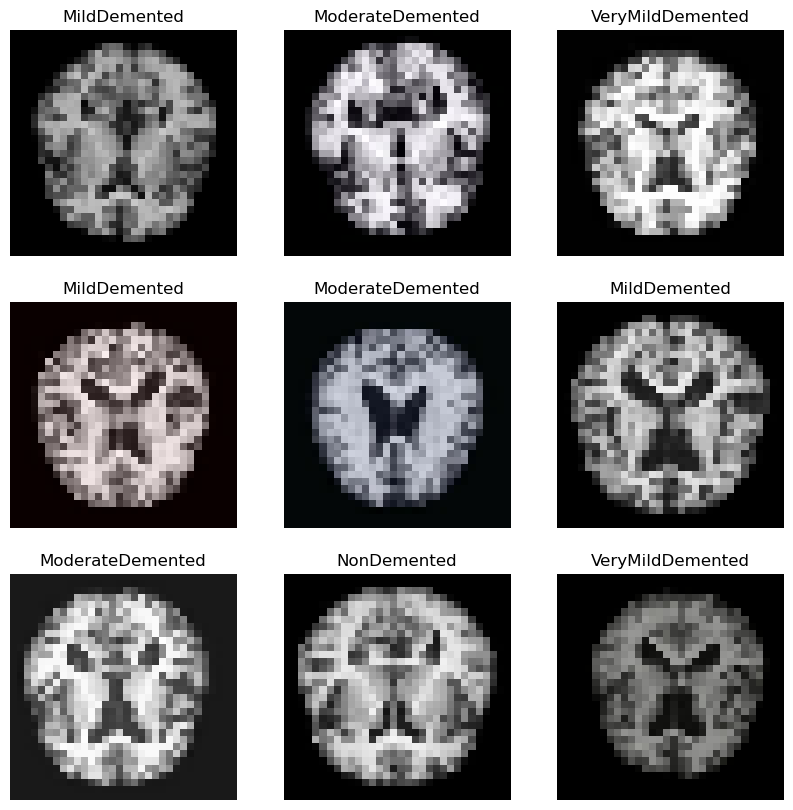

In [25]:
##Verfying that the data is correct

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [26]:
#Creating the convolutional base

model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [27]:
#Dense layers are added to the CNN

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [28]:
#Printing a summary of the model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [29]:
#Training the CNN

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history= model.fit(train_ds, epochs=7, 
                   validation_data=(val_ds))

Epoch 1/7
850/850 [==============================] - 41s 46ms/step - loss: 1.2770 - accuracy: 0.5171 - val_loss: 0.7974 - val_accuracy: 0.5984
Epoch 2/7
850/850 [==============================] - 22s 25ms/step - loss: 0.7755 - accuracy: 0.6547 - val_loss: 0.7707 - val_accuracy: 0.6648
Epoch 3/7
850/850 [==============================] - 21s 25ms/step - loss: 0.6683 - accuracy: 0.7064 - val_loss: 0.6151 - val_accuracy: 0.7336
Epoch 4/7
850/850 [==============================] - 21s 24ms/step - loss: 0.6048 - accuracy: 0.7383 - val_loss: 0.6613 - val_accuracy: 0.7312
Epoch 5/7
850/850 [==============================] - 21s 24ms/step - loss: 0.5498 - accuracy: 0.7635 - val_loss: 0.5219 - val_accuracy: 0.7891
Epoch 6/7
850/850 [==============================] - 21s 24ms/step - loss: 0.5068 - accuracy: 0.7844 - val_loss: 0.4060 - val_accuracy: 0.8188
Epoch 7/7
850/850 [==============================] - 21s 25ms/step - loss: 0.4745 - accuracy: 0.7999 - val_loss: 0.4029 - val_accuracy: 0.8313

850/850 - 11s - loss: 0.4428 - accuracy: 0.8064 - 11s/epoch - 13ms/step


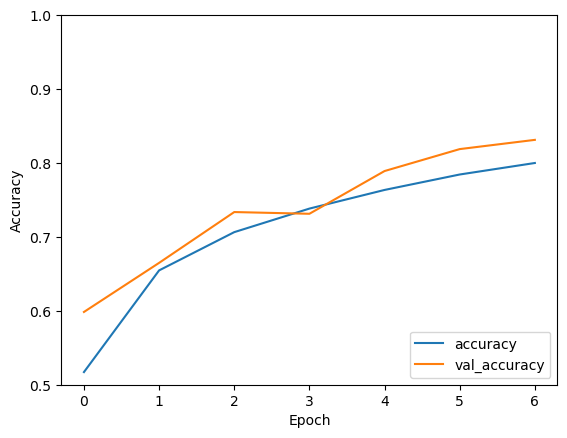

In [30]:
#Model evaluation

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(train_ds, verbose=2)


In [31]:
#Model accuracy

print(test_acc)

0.8064219355583191
